In [1]:
# https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/
# https://medium.com/nlpinfrench/scraper-le-monde-et-construire-ton-propre-corpus-d47fa81eb3d9
# https://nlpforfrench.fr/web/01_lemonde_en.html?_sm_nck=1

In [2]:
# projet : scraper un site web et obtenir un dataframe pandas clean à la fin
# idées : météo, sports, presse

#scraper le top9 articles les plus lus du monde ts les jours ?
#projet de nlp par la suite 
# avec une partie nettoyage ou on fera le traitement de la data
# une partie wordcloud pour voir les grosses tendances
# une partie analyse des mots et expressions qui montent en top 1,2 3

# données needed 
# - place de l'article
# - nom de l'article
# - date du jour


In [3]:
def create_archive_links(year_start, year_end, month_start, month_end, day_start, day_end):
    archive_links = {}
    for y in range(year_start, year_end + 1):
        dates = [str(d).zfill(2) + "-" + str(m).zfill(2) + "-" +
                 str(y) for m in range(month_start, month_end + 1) for d in
                 range(day_start, day_end + 1)]
        archive_links[y] = [
            "https://www.lemonde.fr/archives-du-monde/" + date + "/" for date in dates]
    return archive_links

archive_links = create_archive_links(2022,2022,1, 6, 1, 30)

In [4]:
from urllib.error import HTTPError
from urllib.request import urlopen
from bs4 import BeautifulSoup
def get_articles_links(archive_links):
    links_non_abonne = []
    for link in archive_links:
        try:
            html = urlopen(link)
        except HTTPError as e:
            print("url not valid", link)
        else:
            soup = BeautifulSoup(html, "html.parser")
            news = soup.find_all(class_="teaser")
            # condition here : if no span icon__premium (abonnes)
            for item in news:
                if not item.find('span', {'class': 'icon__premium'}):
                    l_article = item.find('a')['href']
                    # en-direct = video
                    if 'en-direct' not in l_article:
                        links_non_abonne.append(l_article)
    return links_non_abonne

In [5]:
import os

def write_links(path, links, year_fn):
    with open(os.path.join(path + "\_links.txt"), 'w') as f:
        for link in links:
            f.write(link + "\n")

article_links = {}

corpus_path = "lemonde_2022"

for year,links in archive_links.items():
    print("processing: ",year)
    article_links_list = get_articles_links(links)
    article_links[year] = article_links_list    
    write_links(corpus_path,article_links_list,year)

processing:  2022


In [6]:
corpus_path = "lemonde_2022"

infile = corpus_path + "\_links.txt"
outfile = "articles_lemonde_clean.txt"


from nltk.corpus import stopwords
delete_list = ["https://www.lemonde.fr/", "html"]

with open(infile) as fin, open(outfile, "w+") as fout:
    for line in fin:
        for word in delete_list:
            line = line.replace(word, "")
        fout.write(line)

In [7]:
import pandas as pd 

data = pd.read_csv('articles_lemonde_clean.txt', sep="/", header=None,error_bad_lines=False)
data.columns = ["theme", "type", "annee", "mois" ,"jour" , "titre"]

print(data['titre'])
data['titre'] = data['titre'].str.split('_').str[0]
print(data['titre'])
data.to_excel("data_lemonde_articles.xlsx")



titres = data["titre"]
titres.to_csv(r'titres.txt', header=None, index=None, sep=' ', mode='a')

b'Skipping line 20: expected 6 fields, saw 7\nSkipping line 57: expected 6 fields, saw 7\nSkipping line 69: expected 6 fields, saw 7\nSkipping line 87: expected 6 fields, saw 7\nSkipping line 167: expected 6 fields, saw 7\nSkipping line 214: expected 6 fields, saw 7\nSkipping line 284: expected 6 fields, saw 7\nSkipping line 670: expected 6 fields, saw 7\nSkipping line 674: expected 6 fields, saw 7\nSkipping line 681: expected 6 fields, saw 7\nSkipping line 703: expected 6 fields, saw 7\nSkipping line 871: expected 6 fields, saw 7\nSkipping line 1092: expected 6 fields, saw 7\nSkipping line 1464: expected 6 fields, saw 7\nSkipping line 1536: expected 6 fields, saw 7\nSkipping line 1693: expected 6 fields, saw 7\nSkipping line 1765: expected 6 fields, saw 7\nSkipping line 2131: expected 6 fields, saw 7\nSkipping line 2284: expected 6 fields, saw 7\nSkipping line 2448: expected 6 fields, saw 7\nSkipping line 2473: expected 6 fields, saw 7\nSkipping line 2535: expected 6 fields, saw 7\nSk

0       dans-le-colorado-3-personnes-disparues-et-1-00...
1       covid-19-en-france-plus-de-200-000-nouveaux-ca...
2       dakar-2022-le-pilote-francais-philippe-boutron...
3       handball-l-international-francais-elohim-prand...
4       l-obelisque-de-la-place-de-la-concorde-passe-a...
                              ...                        
3512      resto-les-petites-mains-vertes_6132773_6082232.
3513    julie-lou-dubreuilh-bergere-je-me-suis-liee-d-...
3514    tour-de-france-2022-pour-sa-troisieme-saison-a...
3515    l-agneau-aux-herbes-la-recette-de-julie-lou-du...
3516    presidence-de-la-commission-des-finances-le-ca...
Name: titre, Length: 3517, dtype: object
0       dans-le-colorado-3-personnes-disparues-et-1-00...
1       covid-19-en-france-plus-de-200-000-nouveaux-ca...
2       dakar-2022-le-pilote-francais-philippe-boutron...
3       handball-l-international-francais-elohim-prand...
4       l-obelisque-de-la-place-de-la-concorde-passe-a...
                              .

In [8]:
fichier_path = "titres.txt" 
fichier_txt = open(fichier_path,'r',encoding='utf8',errors="ignore")
mon_texte = fichier_txt.read()
mon_texte = mon_texte.replace('-', ',')
print(mon_texte)

dans,le,colorado,3,personnes,disparues,et,1,000,maisons,detruites,apres,des,incendies,devastateurs
covid,19,en,france,plus,de,200,000,nouveaux,cas,en,vingt,quatre,heures,pour,la,troisieme,journee,consecutive
dakar,2022,le,pilote,francais,philippe,boutron,blesse,dans,l,explosion,de,sa,voiture
handball,l,international,francais,elohim,prandi,hospitalise,apres,une,agression,au,couteau,mais,hors,de,danger
l,obelisque,de,la,place,de,la,concorde,passe,au,karcher
covid,19,les,assistantes,maternelles,pourront,garder,jusqu,a,six,enfants
charlie,et,la,chocolaterie,sur,tf1,une,charge,satirique,rejouissante,contre,l,enfant,roi
guinee,bissau,les,bijagos,un,laboratoire,a,ciel,ouvert
irak,des,milliers,de,manifestants,pour,le,deuxieme,anniversaire,de,la,mort,du,general,soleimani
la,chou,chiflette,la,recette,de,samir,ouriaghli
samir,ouriaghli,beaucoup,d,epices,sont,issues,du,terroir,francais
la,commission,europeenne,devoile,un,projet,classant,les,investissements,dans,le,nucleaire,comme,durables
une,mili

In [9]:
#infos sur le texte : type et longueur en caractères
print("type du texte =")
print(type(mon_texte))
#print(mon_texte)
print("longueur du texte = " )
print(len(mon_texte))


import nltk 
from nltk import sent_tokenize
from nltk import word_tokenize


mes_mots = word_tokenize(mon_texte)

from nltk.probability import FreqDist
#problème : les mots de ponctuation / de liaison sont les plus courants
fdist = FreqDist(mes_mots)
fdist.most_common(10)

mots_sans_ponctuation = []
for mot in mes_mots:
    if mot.isalpha():
        mots_sans_ponctuation.append(mot.lower())
        
#print(mots_sans_ponctuation)
print("mots sans ponctuation : ",len(mots_sans_ponctuation))

fdist = FreqDist(mots_sans_ponctuation)
#les mots de liaison restent trop dominants
fdist.most_common(10)

from nltk.corpus import stopwords
mots_de_liaison = stopwords.words("french")
#print(mots_de_liaison)

mots_de_liaison += ["être", "si","non", "oui", "après", "a", "plus",
                    "dont","tous","notamment", "cependant","contre", "apres"]
#print(mots_de_liaison)


mots_nettoyes = []

for mot in mots_sans_ponctuation:
    if mot not in mots_de_liaison:
        mots_nettoyes.append(mot)
        
print("mots nettoyés :" , len(mots_nettoyes))

type du texte =
<class 'str'>
longueur du texte = 
898135
mots sans ponctuation :  144754
mots nettoyés : 86998


[('ukraine', 708), ('macron', 594), ('france', 522), ('guerre', 522), ('emmanuel', 468), ('jean', 402), ('monde', 312), ('paris', 312), ('jour', 311), ('deux', 297), ('pen', 282), ('mort', 273), ('premier', 265), ('tour', 264), ('politiques', 258), ('ans', 255), ('presidentielle', 249), ('infos', 246), ('election', 231), ('marine', 228), ('russie', 219), ('melenchon', 213), ('eric', 208), ('legislatives', 207), ('fait', 205), ('zemmour', 204), ('francais', 202), ('arte', 195), ('campagne', 195), ('annonce', 189), ('luc', 186), ('etats', 182), ('unis', 181), ('sans', 180), ('politique', 180), ('candidats', 177), ('passe', 165), ('face', 165), ('etat', 165), ('football', 163), ('gouvernement', 162), ('enquete', 162), ('etre', 153), ('lors', 153), ('cinq', 151), ('pays', 144), ('prison', 141), ('president', 141), ('ministre', 138), ('morts', 138), ('crise', 138), ('entre', 135), ('nouveau', 135), ('condamne', 135), ('pecresse', 132), ('justice', 132), ('finale', 132), ('russe', 132), ('ga

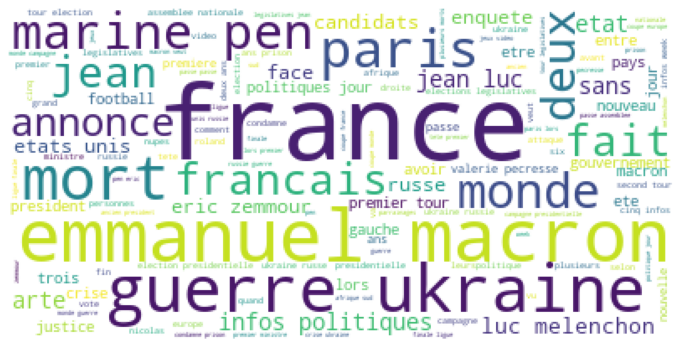

In [10]:
fdist = FreqDist(mots_nettoyes)
# on a notre liste de mots nettoyées

mon_top = fdist.most_common(100)
mon_top_clean = []
for i in range(len(mon_top)):
    mon_top_clean.append(mon_top[i][0])
    
print(mon_top)
print(len(mon_top_clean))

mon_text_en_str = ""  

for ele in mots_nettoyes:  
        if ele in mon_top_clean:
            mon_text_en_str += ' ' +ele   
    

#print(mon_text_en_str)

#rendu graphique
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate(mon_text_en_str)

plt.figure(figsize =(12,12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

In [11]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vbonte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vbonte\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
##partie machine learning pour classifier les articles en thèmes
data = pd.read_csv('articles_lemonde_clean.txt', sep="/", header=None,error_bad_lines=False)
data.columns = ["theme", "type", "annee", "mois" ,"jour" , "titre"]
data['titre'] = data['titre'].str.split('_').str[0]
data = data[["titre","theme"]]


data['compte'] = data.groupby('theme')['theme'].transform('count')
data = data[data.compte > 200]
data = data.reset_index()
data = data[["titre","theme"]]
print(data)

                                                  titre          theme
0     dakar-2022-le-pilote-francais-philippe-boutron...          sport
1     covid-19-les-assistantes-maternelles-pourront-...        societe
2     charlie-et-la-chocolaterie-sur-tf1-une-charge-...        culture
3     guinee-bissau-les-bijagos-un-laboratoire-a-cie...        afrique
4     irak-des-milliers-de-manifestants-pour-le-deux...  international
...                                                 ...            ...
2255  financement-recrutement-et-tri-les-premieres-p...        societe
2256  fausses-accusations-contre-raquel-garrido-et-a...      politique
2257  etats-unis-la-cour-supreme-limite-le-pouvoir-d...  international
2258  tour-de-france-2022-pour-sa-troisieme-saison-a...          sport
2259  presidence-de-la-commission-des-finances-le-ca...      politique

[2260 rows x 2 columns]


b'Skipping line 20: expected 6 fields, saw 7\nSkipping line 57: expected 6 fields, saw 7\nSkipping line 69: expected 6 fields, saw 7\nSkipping line 87: expected 6 fields, saw 7\nSkipping line 167: expected 6 fields, saw 7\nSkipping line 214: expected 6 fields, saw 7\nSkipping line 284: expected 6 fields, saw 7\nSkipping line 670: expected 6 fields, saw 7\nSkipping line 674: expected 6 fields, saw 7\nSkipping line 681: expected 6 fields, saw 7\nSkipping line 703: expected 6 fields, saw 7\nSkipping line 871: expected 6 fields, saw 7\nSkipping line 1092: expected 6 fields, saw 7\nSkipping line 1464: expected 6 fields, saw 7\nSkipping line 1536: expected 6 fields, saw 7\nSkipping line 1693: expected 6 fields, saw 7\nSkipping line 1765: expected 6 fields, saw 7\nSkipping line 2131: expected 6 fields, saw 7\nSkipping line 2284: expected 6 fields, saw 7\nSkipping line 2448: expected 6 fields, saw 7\nSkipping line 2473: expected 6 fields, saw 7\nSkipping line 2535: expected 6 fields, saw 7\nSk

In [26]:
X, y = data.titre, data.theme

documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
#     # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('french'))
X = vectorizer.fit_transform(documents).toarray()

from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[48  4  0  6  2  2  3]
 [ 2 47  0  6  1  0  1]
 [ 0  0 35  1 16  1  0]
 [ 2  4  0 72  7  2  0]
 [ 1  1 13  4 53  5  3]
 [ 3  6  1  3  4 25  2]
 [ 2  2  0  6  1  2 53]]
                              precision    recall  f1-score   support

                     afrique       0.83      0.74      0.78        65
                     culture       0.73      0.82      0.78        57
election-presidentielle-2022       0.71      0.66      0.69        53
               international       0.73      0.83      0.78        87
                   politique       0.63      0.66      0.65        80
                     societe       0.68      0.57      0.62        44
                       sport       0.85      0.80      0.83        66

                    accuracy                           0.74       452
                   macro avg       0.74      0.73      0.73       452
                weighted avg       0.74      0.74      0.74       452

0.7367256637168141


In [33]:
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

df = cm2df(confusion_matrix(y_test,y_pred), [     "afrique",       
                     "culture",    
"election-presidentielle-2022",  
               "international",  
                   "politique",
                     "societe",
                       "sport" 
               ])
print(df)


df.to_excel("matrice_de_confusion.xlsx")

                              afrique  culture  election-presidentielle-2022  \
afrique                            48        4                             0   
culture                             2       47                             0   
election-presidentielle-2022        0        0                            35   
international                       2        4                             0   
politique                           1        1                            13   
societe                             3        6                             1   
sport                               2        2                             0   

                              international  politique  societe  sport  
afrique                                   6          2        2      3  
culture                                   6          1        0      1  
election-presidentielle-2022              1         16        1      0  
international                            72          7        2    